In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_sonar=pd.read_csv('sonar.csv')
df_sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


first i am doing the EDA Process.

In [3]:
df_sonar.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [4]:
df_sonar.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [5]:
df_sonar.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


it indicates that in our dataset the difference between 75% amd maximum value is huge.
there are outliers present in our dataset.

In [6]:
df_sonar.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

no null or missing values are present in the data.

# now the data visualization.

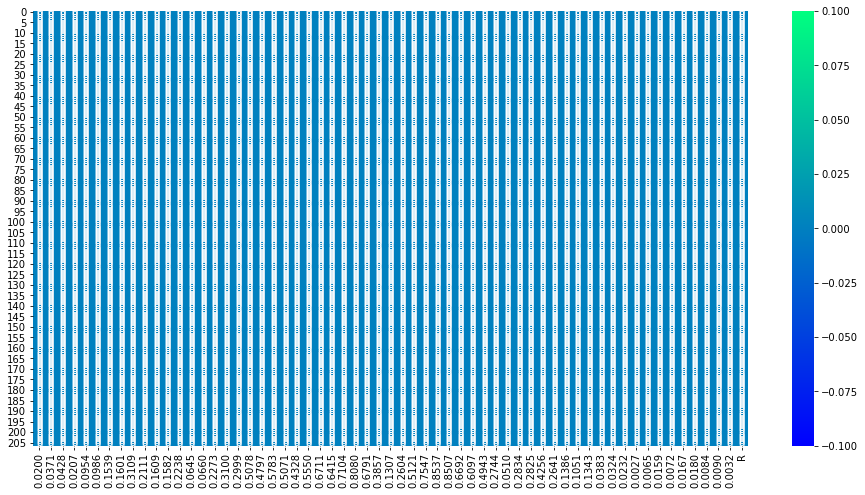

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(df_sonar.isnull(),annot=True,cmap='winter')

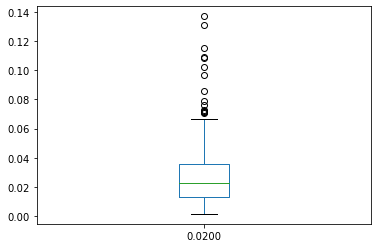

In [8]:
df_sonar['0.0200'].plot.box()

this column indicate the outlier present outside the boxplot

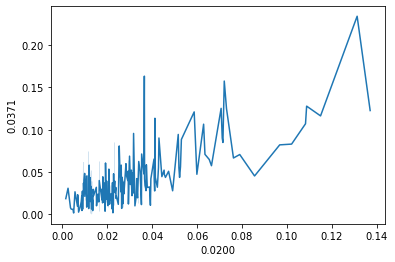

In [9]:
sns.lineplot(x=df_sonar['0.0200'],y=df_sonar['0.0371'],data=df_sonar)

this shows the relationship between the first 2 columns of the dataset

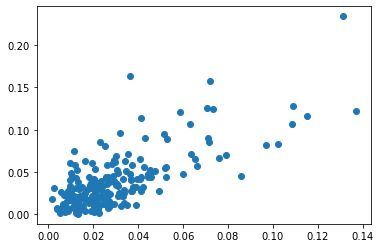

In [10]:
plt.scatter(df_sonar['0.0200'],df_sonar['0.0371'],)

In [12]:
df_corr=df_sonar.corr()
df_corr

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
0.0986,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
0.1539,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
0.1601,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
0.3109,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
0.2111,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


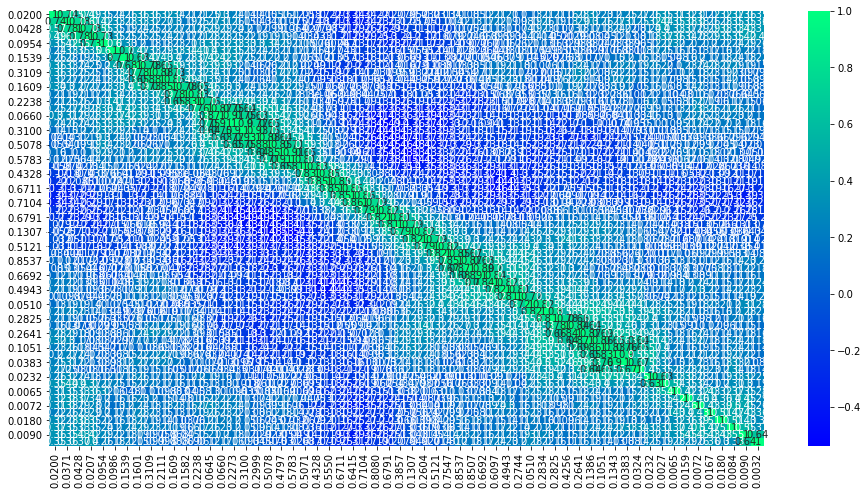

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True,cmap='winter')

In [17]:
df_sonar.skew()

0.0200    2.122983
0.0371    2.149965
0.0428    2.645849
0.0207    3.397590
0.0954    2.020369
0.0986    1.243828
0.1539    0.977346
0.1601    1.482755
0.3109    1.654558
0.2111    1.278532
0.1609    0.980388
0.1582    0.580918
0.2238    0.730580
0.0645    1.028081
0.0660    0.761921
0.2273    0.687003
0.3100    0.648143
0.2999    0.518349
0.5078    0.282680
0.4797   -0.089670
0.5783   -0.253902
0.5071   -0.398178
0.4328   -0.605569
0.5550   -0.698045
0.6711   -0.787297
0.6415   -0.673803
0.7104   -0.625869
0.8080   -0.608543
0.6791   -0.438803
0.3857   -0.142382
0.1307    0.265875
0.2604    0.304906
0.5121    0.429747
0.7547    0.576483
0.8537    0.602241
0.8507    0.631304
0.6692    0.691936
0.6097    1.051649
0.4943    0.920842
0.2744    0.856537
0.0510    0.866684
0.2834    0.858517
0.2825    0.911296
0.4256    1.258602
0.2641    1.371554
0.1386    1.700582
0.1051    1.783552
0.1343    1.287541
0.0383    1.266425
0.0324    1.776935
0.0232    2.724246
0.0027    2.098458
0.0065    1.

this indicates that most of the data is right side skewed.

In [33]:
le=LabelEncoder()
df_sonar['R']=le.fit_transform(df_sonar['R'])
df_sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [38]:
threshold=3
z=abs(zscore(df_sonar))
print(np.where(z>3))

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
        21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
        84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
       100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
       131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
       135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
       139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
       145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
       146, 146, 146, 160, 183, 185, 185, 185], dtype=int64), array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
       47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
        2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
        0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
       51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 45, 59, 53

In [39]:
df_final=df_sonar[(z<3).all(axis=1)]
df_final.shape

(167, 61)

In [40]:
z[1][8]

3.2403355874239526

In [43]:
y=df_final.iloc[:,-1]
y

0      1
3      1
5      1
6      1
7      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: R, Length: 167, dtype: int64

In [42]:
y.shape

(167,)

as per our observation the data is in classes that is rock and mines. so do the classification method of machine learning.

In [46]:
x=df_final.iloc[:,0:-1]

In [47]:
x.shape

(167, 60)

In [84]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.54894817,  1.02475479,  1.9029286 , ..., -0.32316159,
        -0.30112364, -0.35444755],
       [ 3.74840258,  1.68930793,  0.50195379, ..., -0.34600035,
         0.88592385,  1.02791446],
       [ 0.58090352,  3.03700309,  3.75283456, ...,  1.8236817 ,
        -0.64644655,  1.27673962],
       ...,
       [ 2.04008848,  0.62509347, -0.66294515, ...,  1.70948791,
         0.2384434 , -0.71386167],
       [ 0.48125186,  0.23472659,  0.53678465, ...,  0.36200116,
        -0.64644655, -0.24385859],
       [ 0.17517892,  0.28119884, -0.83322938, ..., -0.62006545,
        -0.10687951,  1.6085065 ]])

In [1]:
max_acc_score=0

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [86]:
x_train.shape

(133, 60)

In [87]:
x_test.shape

(34, 60)

In [88]:
y_train.shape

(133,)

In [89]:
y_test.shape

(34,)

In [90]:
lg=LogisticRegression()

In [91]:
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.9473684210526315

In [92]:
predlg=lg.predict(x_test)
print('the accuracy score is:',accuracy_score(predlg,y_test))
print('the confusion matrix is:',confusion_matrix(predlg,y_test))
print(classification_report(predlg,y_test))

the accuracy score is: 0.7058823529411765
the confusion matrix is: [[15  4]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.69      0.60      0.64        15

    accuracy                           0.71        34
   macro avg       0.70      0.69      0.70        34
weighted avg       0.70      0.71      0.70        34



In [93]:
models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [94]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(predm,y_test))
    print('the confusion matrix of',m,'model is:',confusion_matrix(predm,y_test))
    print(classification_report(predm,y_test))

the accuracy score of LogisticRegression() is: 0.7058823529411765
the confusion matrix of LogisticRegression() model is: [[15  4]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.69      0.60      0.64        15

    accuracy                           0.71        34
   macro avg       0.70      0.69      0.70        34
weighted avg       0.70      0.71      0.70        34

the accuracy score of GaussianNB() is: 0.6764705882352942
the confusion matrix of GaussianNB() model is: [[15  5]
 [ 6  8]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.62      0.57      0.59        14

    accuracy                           0.68        34
   macro avg       0.66      0.66      0.66        34
weighted avg       0.67      0.68      0.67        34

the accuracy score of SVC() is: 0.8823529411764706
the confusion matrix of SVC() m

from this we have concluded that our model is getting highest accuracy in SVC.

but in SVC there are 3 kernels. we should check from which kernel the model is getting the highest accuracy.by default it is rbf

In [95]:
def svckernel(kern):
    svc=SVC(kernel=kern)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred=svc.predict(x_test)
    print('the accuracy score is:',accuracy_score(pred,y_test))
    print('the confusion matrix is:',confusion_matrix(pred,y_test))
    print(classification_report(pred,y_test))

In [96]:
svckernel('rbf')

the accuracy score is: 0.8823529411764706
the confusion matrix is: [[19  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.85      0.85      0.85        13

    accuracy                           0.88        34
   macro avg       0.88      0.88      0.88        34
weighted avg       0.88      0.88      0.88        34



In [97]:
svckernel('poly')

the accuracy score is: 0.6764705882352942
the confusion matrix is: [[12  2]
 [ 9 11]]
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        14
           1       0.85      0.55      0.67        20

    accuracy                           0.68        34
   macro avg       0.71      0.70      0.68        34
weighted avg       0.73      0.68      0.67        34



In [98]:
svckernel('linear')

the accuracy score is: 0.6764705882352942
the confusion matrix is: [[14  4]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        18
           1       0.69      0.56      0.62        16

    accuracy                           0.68        34
   macro avg       0.68      0.67      0.67        34
weighted avg       0.68      0.68      0.67        34



as per this observation we obtain rbf is giving the highest accuracy.so we select this model.

# cross validation:

In [99]:
lg=LogisticRegression()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()

In [100]:
crossvalidation=[lg,nb,dtc,knn,svc]

In [101]:
for c in crossvalidation:
    cross_scores=cross_val_score(c,x,y,cv=5)
    print('the score of:',c,cross_scores)
    print('the mean and standard deviation of:',c,cross_scores.mean(),cross_scores.std())
    print('\n')

the score of: LogisticRegression() [0.5        0.79411765 0.6969697  0.87878788 0.63636364]
the mean and standard deviation of: LogisticRegression() 0.7012477718360071 0.1302875450147863


the score of: GaussianNB() [0.52941176 0.79411765 0.60606061 0.81818182 0.42424242]
the mean and standard deviation of: GaussianNB() 0.634402852049911 0.15184027191945962


the score of: DecisionTreeClassifier() [0.41176471 0.70588235 0.54545455 0.81818182 0.60606061]
the mean and standard deviation of: DecisionTreeClassifier() 0.6174688057040998 0.13837127309871447


the score of: KNeighborsClassifier() [0.70588235 0.61764706 0.60606061 0.84848485 0.42424242]
the mean and standard deviation of: KNeighborsClassifier() 0.640463458110517 0.13856998985834784


the score of: SVC() [0.55882353 0.76470588 0.57575758 0.93939394 0.60606061]
the mean and standard deviation of: SVC() 0.6889483065953654 0.1449670275318892




# roc_auc curve.

In [102]:
lg.fit(x_train,y_train)
y_pred_problm=lg.predict_proba(x_test)[:,1]
y_pred_problm

array([8.53083268e-01, 8.55105417e-01, 9.93655530e-01, 4.36647590e-01,
       3.32259707e-06, 6.27342925e-02, 9.97944785e-01, 9.49552525e-01,
       1.61968937e-01, 4.56160586e-01, 8.65076996e-01, 5.03859417e-01,
       2.09186267e-01, 9.12569438e-03, 9.93654528e-01, 5.52407597e-01,
       1.26972471e-02, 4.15446584e-01, 8.77658654e-01, 3.55721806e-02,
       5.23786713e-03, 5.27064885e-01, 7.81349792e-01, 1.39258760e-01,
       9.96177991e-01, 2.42046984e-02, 9.98483183e-01, 2.63987256e-01,
       6.20403398e-05, 9.99292963e-01, 2.20872647e-05, 3.86494602e-03,
       1.51963787e-07, 8.26543611e-03])

In [106]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_problm)

In [107]:
fpr

array([0.        , 0.        , 0.        , 0.0952381 , 0.0952381 ,
       0.28571429, 0.28571429, 0.42857143, 0.42857143, 0.52380952,
       0.52380952, 0.80952381, 0.80952381, 1.        ])

In [108]:
thresholds

array([1.99929296e+00, 9.99292963e-01, 9.93654528e-01, 8.77658654e-01,
       8.53083268e-01, 5.03859417e-01, 4.56160586e-01, 2.63987256e-01,
       2.09186267e-01, 1.39258760e-01, 6.27342925e-02, 5.23786713e-03,
       3.86494602e-03, 1.51963787e-07])

In [110]:
tpr

array([0.        , 0.07692308, 0.46153846, 0.46153846, 0.69230769,
       0.69230769, 0.76923077, 0.76923077, 0.84615385, 0.84615385,
       0.92307692, 0.92307692, 1.        , 1.        ])

Text(0.5, 1.0, 'logistic regression')

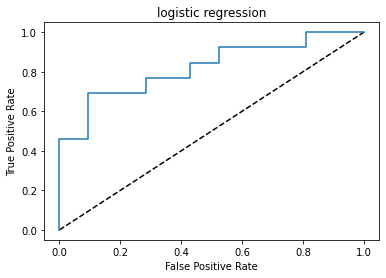

In [109]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic regression')

In [116]:
import joblib

In [121]:
joblib.dump(svc,'sonardataset.obj')

['sonardataset.obj']

In [122]:
svc_from_joblib=joblib.load('sonardataset.obj')